<h1 style='text-align:center;color:#ff7392'><strong>Introduction To Data Visualizations and Exploraiton</strong></h1>
<h3 style='text-align:center;color:#FFC0CB'><strong>Assignment 1</strong></h3>
<h6 style='color:lightcoral'><strong>1858893: Molefe Molefe</strong></h6>
<h6 style='color:lightcoral'><strong>1814731: Shameel Nkosi</strong></h6>
<h6 style='color:lightcoral'><strong>1390537: Siraj Motaung</strong></h6>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


<a id="section_n" name="section_n"></a>

## Table of Contents
* [1. Introduction](#chapter2)
    * [Additional Filters](#section_2_1)
* [2. Gaussian Edge and Bar Filters - The RFS/MR8 Filter Banks](#chapter3)
    * [Edge Filters](#section_3_1)
    * [Bar Filters](#section_3_2)
    * [Root Filter Set](#section_3_3)
    * [MR8](#section_3_4)
* [3. Local Binary Patterns and Haar Filters](#chapter4)
    * [Implement The Local Binary Pattern and Apply It To Training Image](#section_4_1)
    * [Integral Image](#section_4_2)
    * [Applying Checkered Haar Filter](#section_4_3)
* [4. Textons and Classification](#chapter5)
    * [Applying Feature Extraction Methods To Image](#section_5_1)
    * [Replace Pixels of Image With Corresponding Centroid](#section_5_2)
    * [Training Background Classifier on Current Set of Features](#section_5_3)
    * [Find The Accuracy of The Model](#section_5_4)
* [5. Applying The MR8 Feature Bank on The HSV Pixels](#chapter6)
* [6. Applying Adjustments To Model](#chapter7)

<a id="chapter2" name="chapter2">Chapter 2</a>

<h2 style='text-align:center;color:#ff7392'><strong>1. Glass Identification Databse </strong></h2>

In [2]:
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)

<a id="section_2_1" name="section_2_1">Section 2.1 </a>

<h4 style="color:#ff7392"><strong>Read In Data</strong></h4>

> <strong>Missing Values: </strong> None

In [3]:
columns = ['ID','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type']

In [4]:
glass_df = pd.read_csv('glass/glass.data',header=None)
glass_df.columns = columns
glass_df.set_index('ID',inplace=True)

In [5]:
glass_df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [6]:
glass_df.dtypes.to_frame().T

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64


In [7]:
glass_df.Type = glass_df.Type.astype('object')

In [8]:
glass_df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
ID,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7


In [9]:
np.amin(glass_df),np.amax(glass_df)

(RI      1.51115
 Na        10.73
 Mg          0.0
 Al         0.29
 Si        69.81
 K           0.0
 Ca         5.43
 Ba          0.0
 Fe          0.0
 Type          1
 dtype: object,
 RI      1.53393
 Na        17.38
 Mg         4.49
 Al          3.5
 Si        75.41
 K          6.21
 Ca        16.19
 Ba         3.15
 Fe         0.51
 Type          7
 dtype: object)

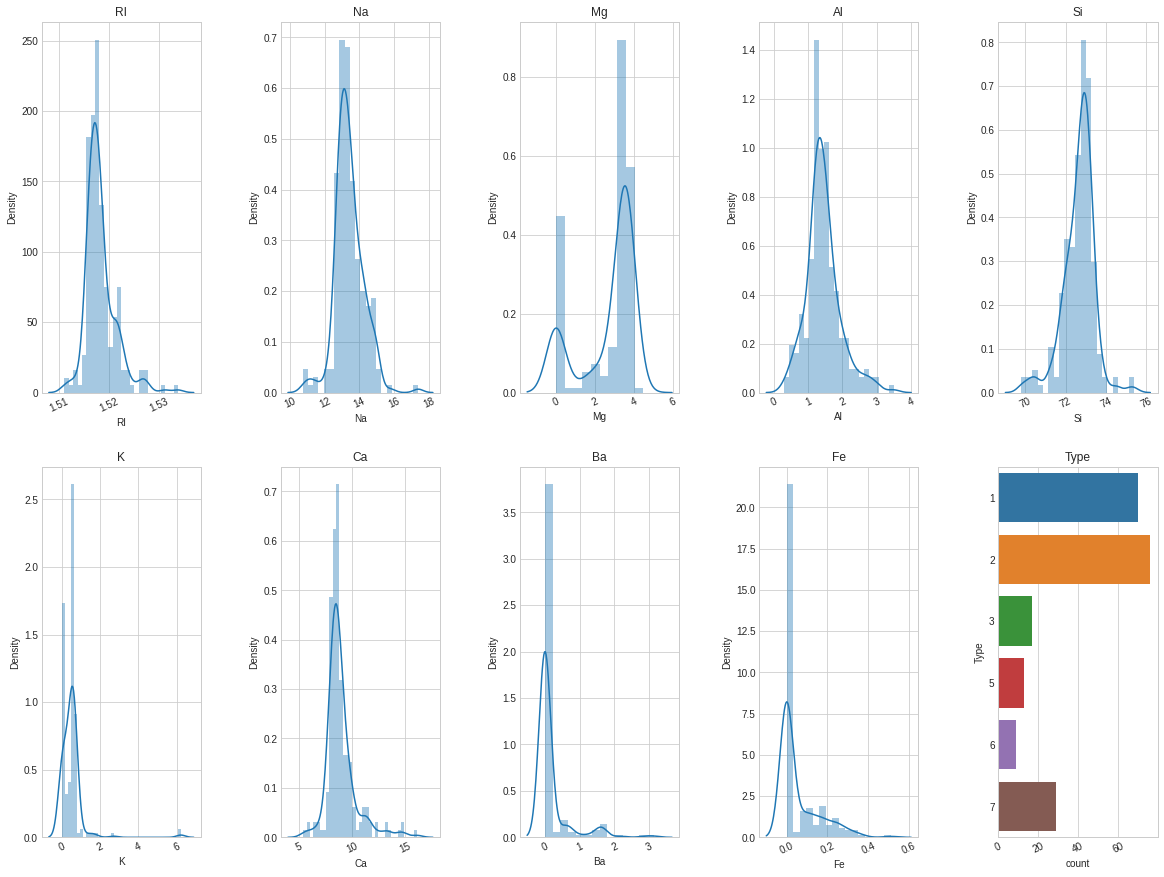

In [10]:
plot_distribution(glass_df)

In [11]:
glass_data = (glass_df.values[:,:-1]).astype(np.float64)
glass_target = glass_df.values[:,-1]
cov_data = np.corrcoef(glass_data.T)

(-0.5, 8.5, 8.5, -0.5)

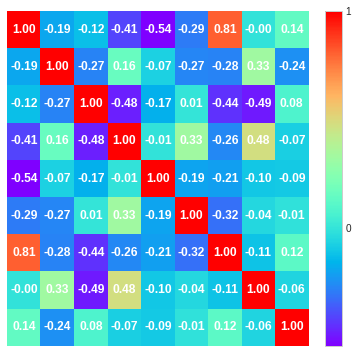

In [12]:
plt.figure(figsize=(6,6))
visualize_covariance = plt.matshow(cov_data,cmap=plt.cm.rainbow,fignum=1,aspect='auto')
plt.colorbar(visualize_covariance,ticks=[-1,0,1],fraction=0.05)
for x in range(cov_data.shape[0]):
    for y in range(cov_data.shape[1]):
        plt.text(x,y,"%0.2f"%cov_data[x,y],size=12,color='white',weight='bold',ha='center',va='center')
        
plt.axis('off')

In [13]:
colors = ['red','blue','orange','green','yellow','gray','teal','pink']

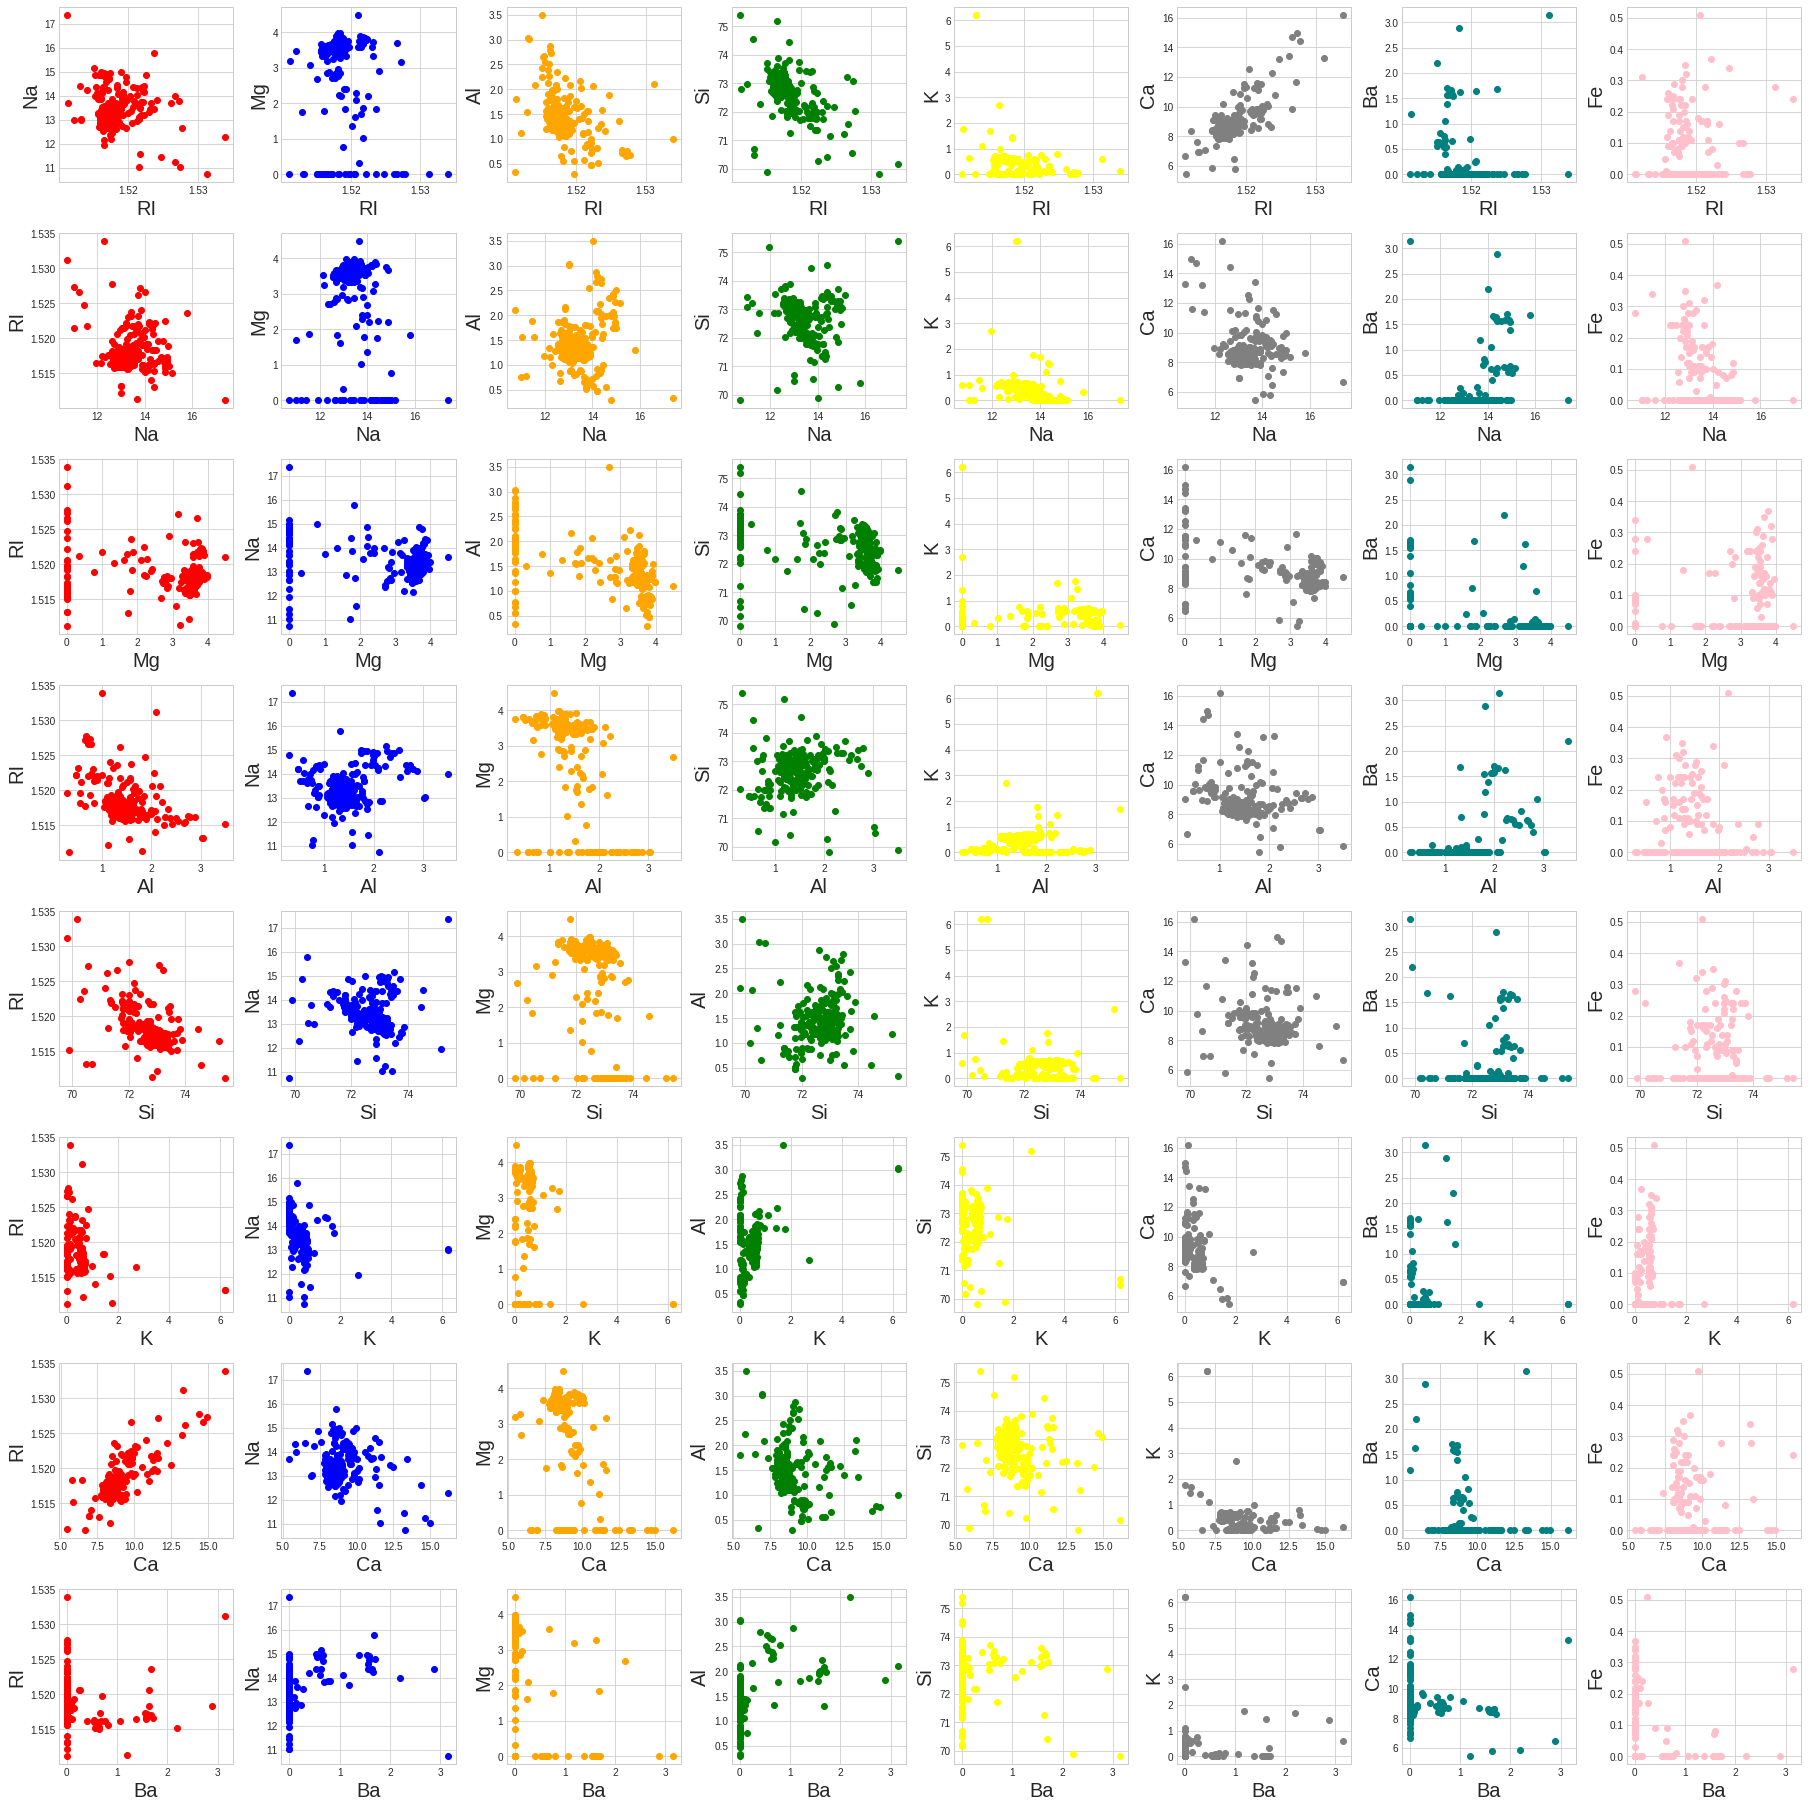

In [14]:
fig1, f1_axes = plt.subplots(ncols=8, nrows=8, constrained_layout=True,figsize=(25,25))
for row in range(len(columns[1:9])):
    chosen = columns[1:-1][row]
    other_columns =[col for col in columns[1:-1] if col != chosen ]
    for col in range(len(other_columns)):
        f1_axes[row,col].scatter(glass_df[chosen],glass_df[other_columns[col]],color=colors[col])
        f1_axes[row][col].set_xlabel(chosen,fontsize=20)
        f1_axes[row][col].set_ylabel(other_columns[col],fontsize=20)    

In [15]:
colors2 = ['red','blue','orange','green','yellow','gray','teal','pink','purple']

9

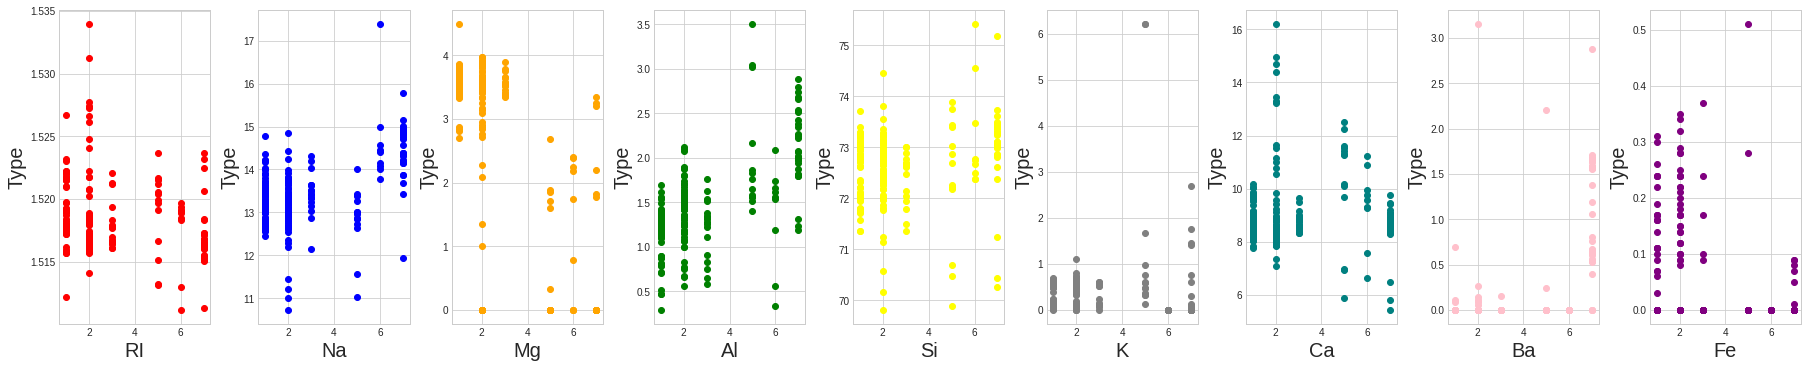

In [16]:
fig2, f2_axes = plt.subplots(ncols=9, nrows=1, constrained_layout=True,figsize=(25,5))
chosen = 'Type'
other_columns =[col for col in columns[1:-1] if col != chosen ]
for col in range(len(other_columns)):
    f2_axes[col].scatter(glass_df[chosen],glass_df[other_columns[col]],color=colors2[col])
    f2_axes[col].set_xlabel(other_columns[col],fontsize=20)
    f2_axes[col].set_ylabel(chosen,fontsize=20)    
# # columns[1:]
len(other_columns)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
import math

In [18]:
glass_target = glass_target.astype(np.uint8)

<a id="section_2_1" name="section_2_1">Section 2.1 </a>

<h4 style="color:#ff7392"><strong>Without Standardization</strong></h4>


In [19]:
X_train,X_test,y_train,y_test = train_test_split(glass_data,glass_target,test_size=0.2,random_state=0)

In [20]:
regressor = RandomForestRegressor(n_estimators=20,random_state=0)

In [21]:
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
preds = [math.ceil(pred) for pred in y_pred]

In [22]:
print("Confusion Matrix: \n",confusion_matrix(y_test,preds))
print("=============================================")
print(classification_report(y_test,preds))
print("=============================================")
print("Accuracy: {}%".format(accuracy_score(y_test, preds)))

Confusion Matrix: 
 [[ 3  5  1  0  0  0  0]
 [ 0 15  3  1  0  0  0]
 [ 0  2  3  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  1  0  1  0  0]
 [ 0  0  0  0  1  1  0]
 [ 0  0  0  0  0  1  5]]
              precision    recall  f1-score   support

           1       1.00      0.33      0.50         9
           2       0.68      0.79      0.73        19
           3       0.38      0.60      0.46         5
           4       0.00      0.00      0.00         0
           5       0.50      0.50      0.50         2
           6       0.50      0.50      0.50         2
           7       1.00      0.83      0.91         6

    accuracy                           0.65        43
   macro avg       0.58      0.51      0.51        43
weighted avg       0.74      0.65      0.65        43

Accuracy: 0.6511627906976745%


In [23]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_preds = clf.predict(X_test)

In [24]:
print("Logistic Regression Confusion Matrix: \n",confusion_matrix(y_test,y_preds))
print("=============================================")
print(classification_report(y_test,y_preds))
print("=============================================")
print("Logistic Regression Accuracy: {}%".format(accuracy_score(y_test, y_preds)))

Logistic Regression Confusion Matrix: 
 [[ 6  3  0  0  0  0]
 [10  8  0  1  0  0]
 [ 3  2  0  0  0  0]
 [ 0  1  0  1  0  0]
 [ 0  1  0  0  0  1]
 [ 0  0  0  0  1  5]]
              precision    recall  f1-score   support

           1       0.32      0.67      0.43         9
           2       0.53      0.42      0.47        19
           3       0.00      0.00      0.00         5
           5       0.50      0.50      0.50         2
           6       0.00      0.00      0.00         2
           7       0.83      0.83      0.83         6

    accuracy                           0.47        43
   macro avg       0.36      0.40      0.37        43
weighted avg       0.44      0.47      0.44        43

Logistic Regression Accuracy: 0.46511627906976744%


<a id="section_2_1" name="section_2_1">Section 2.1 </a>

<h4 style="color:#ff7392"><strong>With Standardization</strong></h4>


In [25]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
regressor = RandomForestRegressor(n_estimators=20,random_state=0)

In [27]:
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
preds = [math.ceil(pred) for pred in y_pred]

In [28]:
print("Random Forest Confusion Matrix: \n",confusion_matrix(y_test,preds))
print("=============================================")
print(classification_report(y_test,preds))
print("=============================================")
print("Random Forest Accuracy: {}%".format(accuracy_score(y_test, preds)))

Random Forest Confusion Matrix: 
 [[ 3  5  1  0  0  0  0]
 [ 0 15  3  1  0  0  0]
 [ 0  2  3  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  1  0  1  0  0]
 [ 0  0  0  0  1  1  0]
 [ 0  0  0  0  0  1  5]]
              precision    recall  f1-score   support

           1       1.00      0.33      0.50         9
           2       0.68      0.79      0.73        19
           3       0.38      0.60      0.46         5
           4       0.00      0.00      0.00         0
           5       0.50      0.50      0.50         2
           6       0.50      0.50      0.50         2
           7       1.00      0.83      0.91         6

    accuracy                           0.65        43
   macro avg       0.58      0.51      0.51        43
weighted avg       0.74      0.65      0.65        43

Random Forest Accuracy: 0.6511627906976745%


In [29]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_preds = clf.predict(X_test)

In [30]:
print("Logistic Regression Confusion Matrix: \n",confusion_matrix(y_test,y_preds))
print("=============================================")
print(classification_report(y_test,y_preds))
print("=============================================")
print("Logistic Regression Accuracy: {}%".format(accuracy_score(y_test, y_preds)))

Logistic Regression Confusion Matrix: 
 [[6 3 0 0 0 0]
 [9 9 0 1 0 0]
 [3 2 0 0 0 0]
 [0 1 0 1 0 0]
 [0 1 0 0 1 0]
 [0 0 0 0 0 6]]
              precision    recall  f1-score   support

           1       0.33      0.67      0.44         9
           2       0.56      0.47      0.51        19
           3       0.00      0.00      0.00         5
           5       0.50      0.50      0.50         2
           6       1.00      0.50      0.67         2
           7       1.00      1.00      1.00         6

    accuracy                           0.53        43
   macro avg       0.57      0.52      0.52        43
weighted avg       0.53      0.53      0.51        43

Logistic Regression Accuracy: 0.5348837209302325%


In [31]:
columns = ['class', 'date', 'plant-stand', 'precip', 'temp', 'hail', 'crop-hist', \
           'area-damaged', 'severity', 'seed-tmt', 'germination', 'plant-growth', \
          'leaves', 'leafspots-halo', 'leafspots-marg', 'leafspot-size', 'leaf-shread', \
           'leaf-malf', 'leaf-mild', 'stem', 'lodging', 'stem-cankers', 'canker-lesion',\
          'fruiting-bodies', 'external decay', 'mycelium', 'int-discolor', 'sclerotia',\
          'fruit-pods', 'fruit spots', 'seed', 'mold-growth', 'seed-discolor', 'seed-size',\
          'shriveling', 'roots']

soya_df = pd.read_csv('soybeans/soybean-large.data', names=columns)
#display(soya_df)

def create_dict(vals):
    temp_dic = {k: v for k, v in enumerate(vals.strip().split(',')) if v != '?'}
    temp_dic['?'] = None
    return temp_dic

maps = {
    'date': create_dict('april,may,june,july,august,september,october,?'),
    'plant-stand': create_dict('normal,lt-normal,?'),
    'precip': create_dict('lt-norm,norm,gt-norm,?'),
    'temp': create_dict('lt-norm,norm,gt-norm,?'),
    'hail': create_dict('yes,no,?'),
    'crop-hist': create_dict('diff-lst-year,same-lst-yr,same-lst-two-yrs,same-lst-sev-yrs,?'),
    'area-damaged': create_dict('scattered,low-areas,upper-areas,whole-field,?'),
    'severity': create_dict('minor,pot-severe,severe,?'),
    'seed-tmt': create_dict('none,fungicide,other,?'),
    'germination': create_dict('90-100%,80-89%,lt-80%,?'),
    'plant-growth': create_dict('norm,abnorm,?'),
    'leaves': create_dict('norm,abnorm'),
    'leafspots-halo': create_dict('absent,yellow-halos,no-yellow-halos,?'),
    'leafspots-marg': create_dict('w-s-marg,no-w-s-marg,dna,?'),
    'leafspot-size': create_dict('lt-1/8,gt-1/8,dna,?'),
    'leaf-shread': create_dict('absent,present,?'),
    'leaf-malf': create_dict('absent,present,?'),
    'leaf-mild': create_dict('absent,upper-surf,lower-surf,?'),
    'stem': create_dict('norm,abnorm,?'),
    'lodging': create_dict('yes,no,?'),
    'stem-cankers': create_dict('absent,below-soil,above-soil,above-sec-nde,?'),
    'canker-lesion': create_dict('dna,brown,dk-brown-blk,tan,?'),
    'fruiting-bodies': create_dict('absent,present,?'),
    'external decay': create_dict('absent,firm-and-dry,watery,?'),
    'mycelium': create_dict('absent,present,?'),
    'int-discolor': create_dict('none,brown,black,?'),
    'sclerotia': create_dict('absent,present,?'),
    'fruit-pods': create_dict('norm,diseased,few-present,dna,?'),
    'fruit spots': create_dict('absent,colored,brown-w/blk-specks,distort,dna,?'),
    'seed': create_dict('norm,abnorm,?'),
    'mold-growth': create_dict('absent,present,?'),
    'seed-discolor': create_dict('absent,present,?'),
    'seed-size': create_dict('norm,lt-norm,?'),
    'shriveling': create_dict('absent,present,?'),
    'roots': create_dict('norm,rotted,galls-cysts,?')
}

def get_map_val(key, val):
    if val == '?':
        search_val = '?'
    else:
        search_val = int(val)
        
    return maps.get(key).get(search_val)

for c in maps.keys():
    soya_df[c] = soya_df[c].apply(lambda x: get_map_val(c, x))
soya_df

,class,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,...,int-discolor,sclerotia,fruit-pods,fruit spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots
0,diaporthe-stem-canker,october,normal,gt-norm,norm,yes,same-lst-yr,low-areas,pot-severe,none,...,none,absent,norm,dna,norm,absent,absent,norm,absent,norm
1,diaporthe-stem-canker,august,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,severe,fungicide,...,none,absent,norm,dna,norm,absent,absent,norm,absent,norm
2,diaporthe-stem-canker,july,normal,gt-norm,norm,yes,same-lst-yr,scattered,severe,fungicide,...,none,absent,norm,dna,norm,absent,absent,norm,absent,norm
3,diaporthe-stem-canker,july,normal,gt-norm,norm,yes,same-lst-yr,scattered,severe,none,...,none,absent,norm,dna,norm,absent,absent,norm,absent,norm
4,diaporthe-stem-canker,october,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,pot-severe,none,...,none,absent,norm,dna,norm,absent,absent,norm,absent,norm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,2-4-d-injury,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
303,herbicide-injury,may,lt-normal,None,lt-norm,None,same-lst-yr,scattered,None,None,...,None,None,dna,None,None,None,None,None,None,rotted
304,herbicide-injury,april,lt-normal,None,lt-norm,None,diff-lst-year,whole-field,None,None,...,None,None,dna,None,None,None,None,None,None,rotted
305,herbicide-injury,may,lt-normal,None,lt-norm,None,diff-lst-year,scattered,None,None,...,None,None,dna,None,None,None,None,None,None,rotted


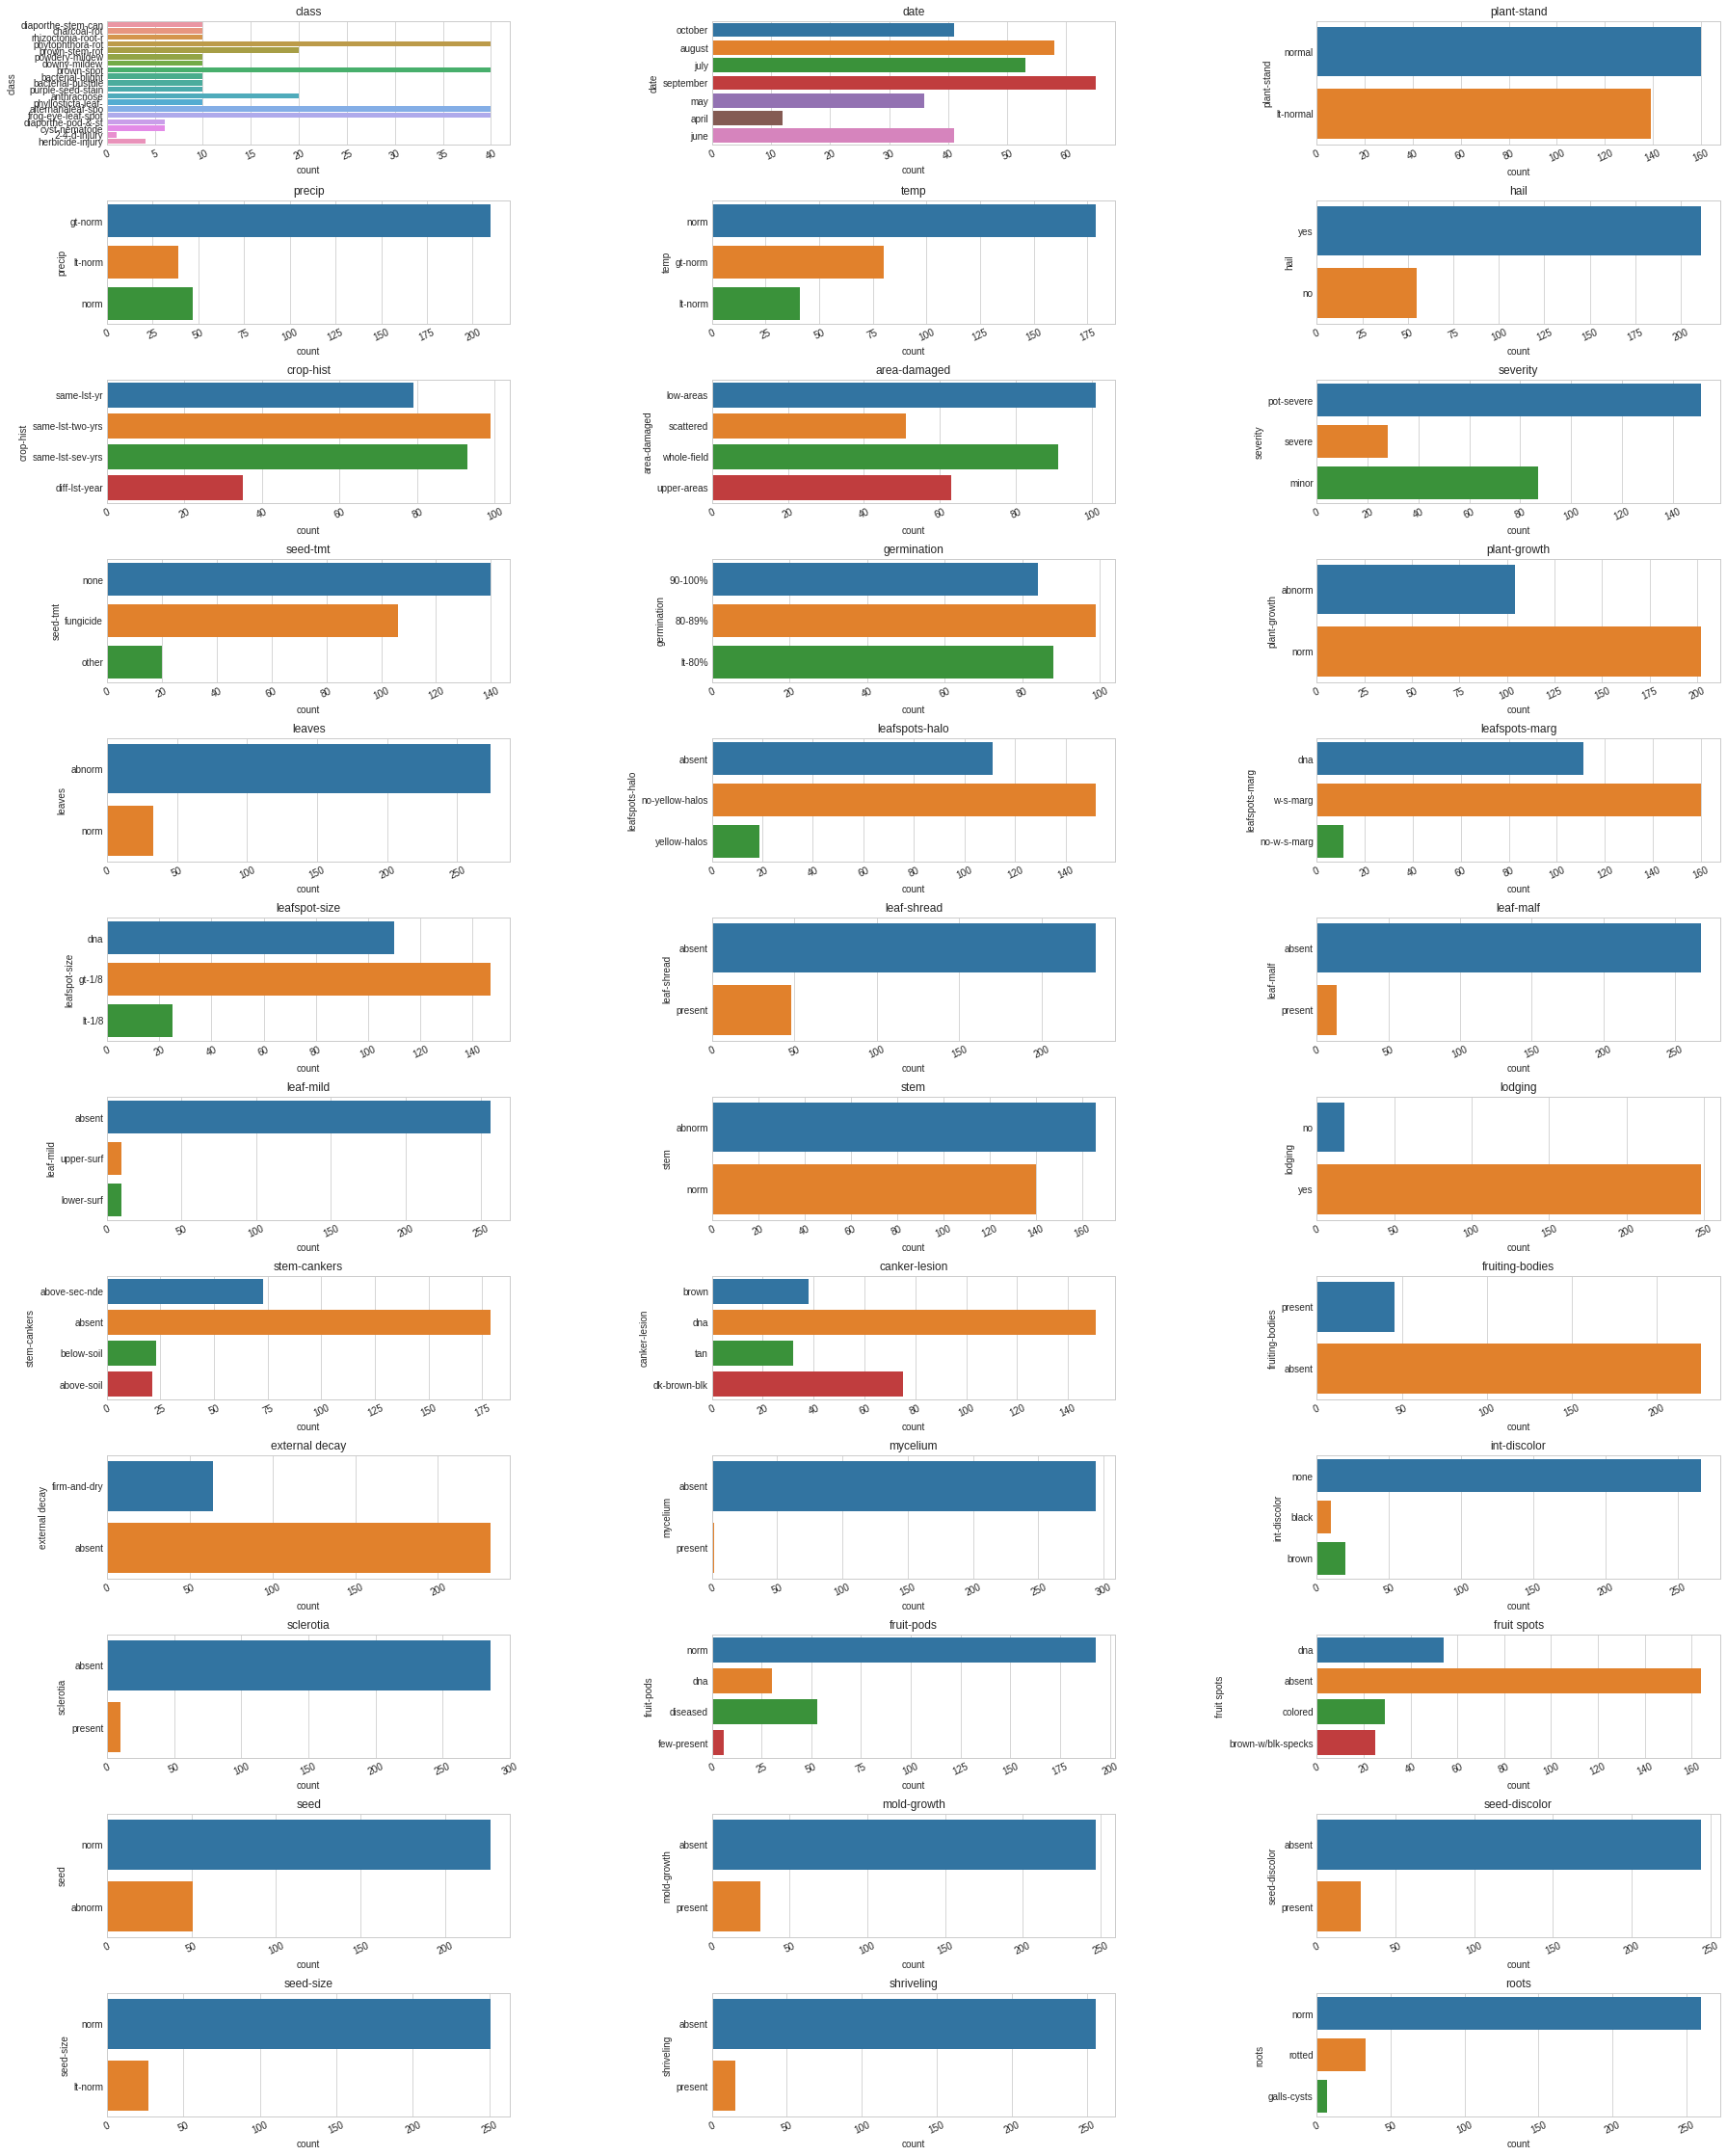

In [32]:

def plot_distribution(dataset, cols=3, width=30, height=40, hspace=0.45, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)
    print()
            
plot_distribution(soya_df)

<h2 style='color:tomato'>Frequency distributions for the categorical feature.</h2>.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'diaporthe-stem-canker'),
  Text(1, 0, 'charcoal-rot'),
  Text(2, 0, 'rhizoctonia-root-rot'),
  Text(3, 0, 'phytophthora-rot'),
  Text(4, 0, 'brown-stem-rot'),
  Text(5, 0, 'powdery-mildew'),
  Text(6, 0, 'downy-mildew'),
  Text(7, 0, 'brown-spot'),
  Text(8, 0, 'bacterial-blight'),
  Text(9, 0, 'bacterial-pustule'),
  Text(10, 0, 'purple-seed-stain'),
  Text(11, 0, 'anthracnose'),
  Text(12, 0, 'phyllosticta-leaf-spot'),
  Text(13, 0, 'alternarialeaf-spot'),
  Text(14, 0, 'frog-eye-leaf-spot'),
  Text(15, 0, 'diaporthe-pod-&-stem-blight'),
  Text(16, 0, 'cyst-nematode'),
  Text(17, 0, '2-4-d-injury'),
  Text(18, 0, 'herbicide-injury')])

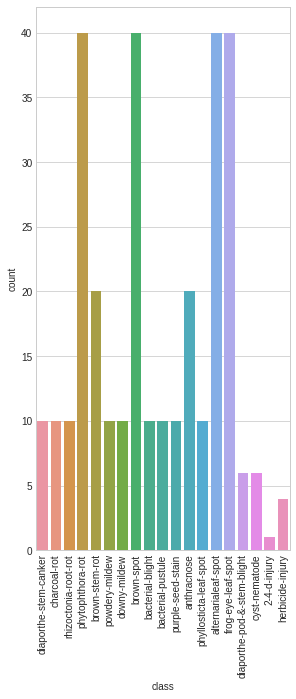

In [33]:
plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
sns.countplot(soya_df['class'],data = soya_df)
plt.xticks(rotation=90)
#display(list(enumerate(columns)))



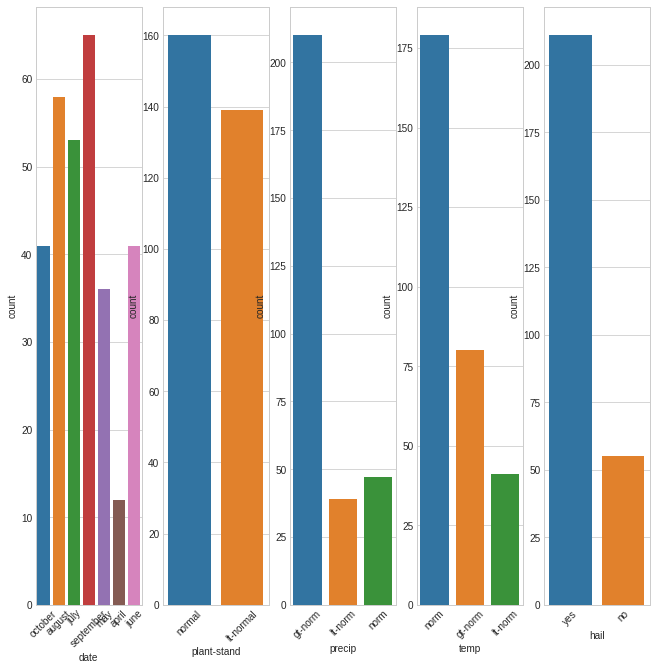

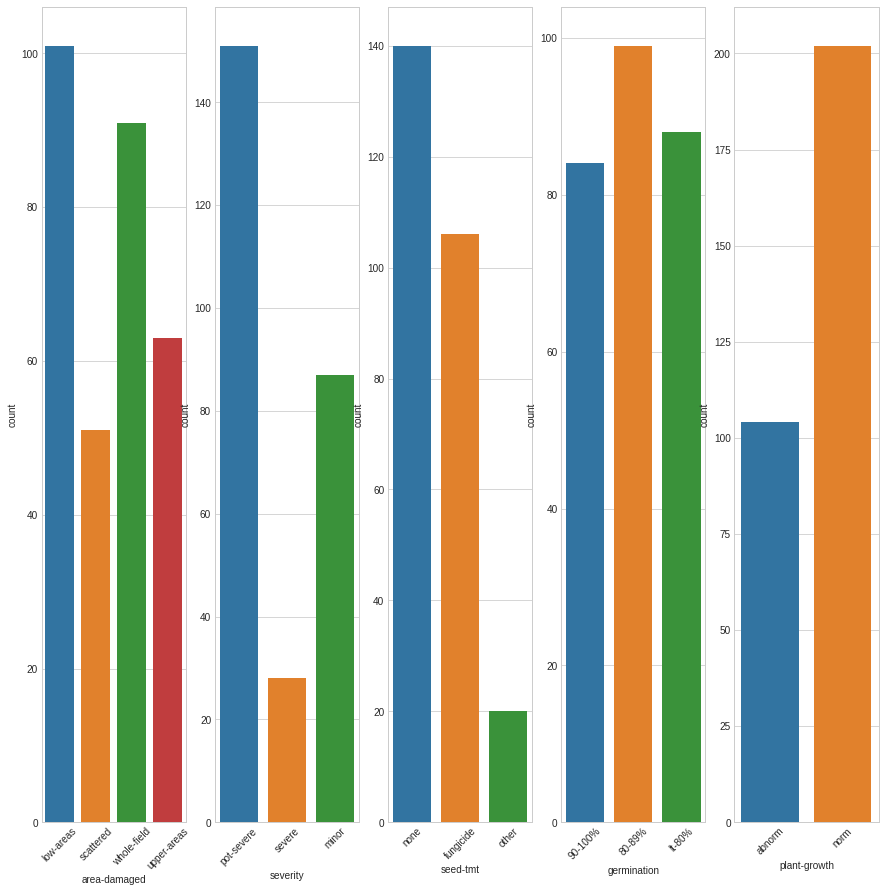

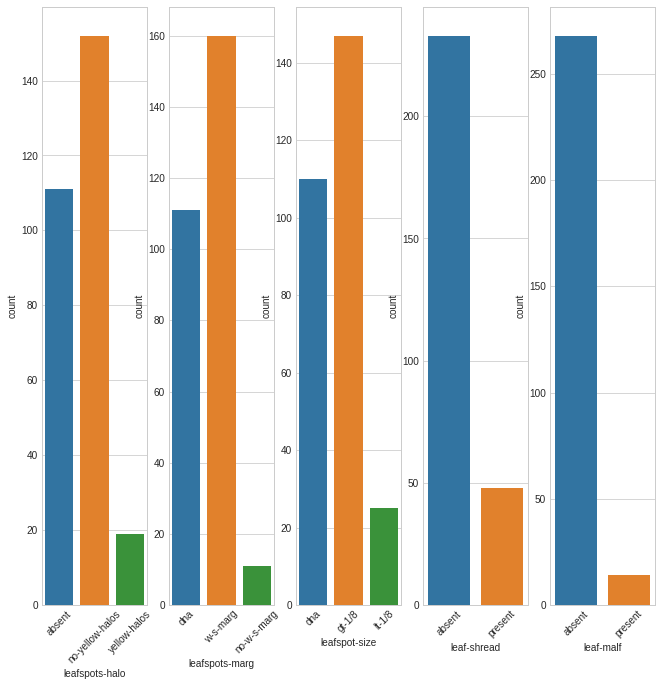

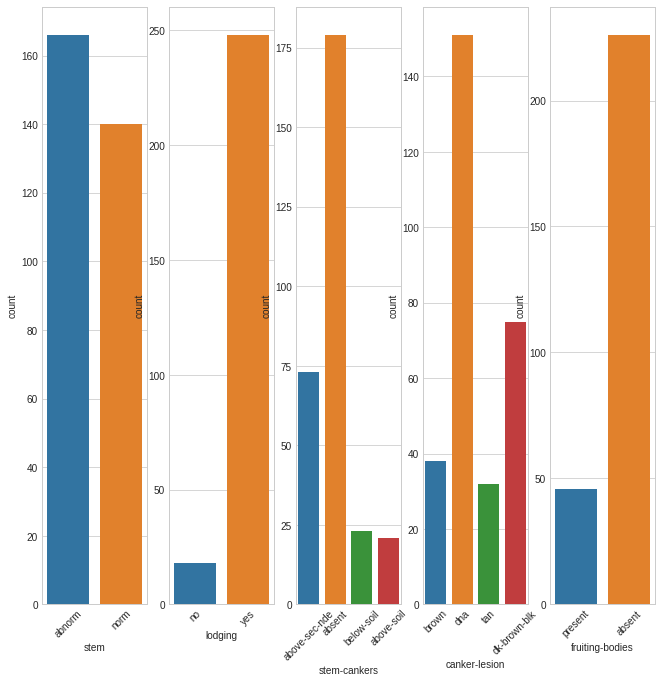

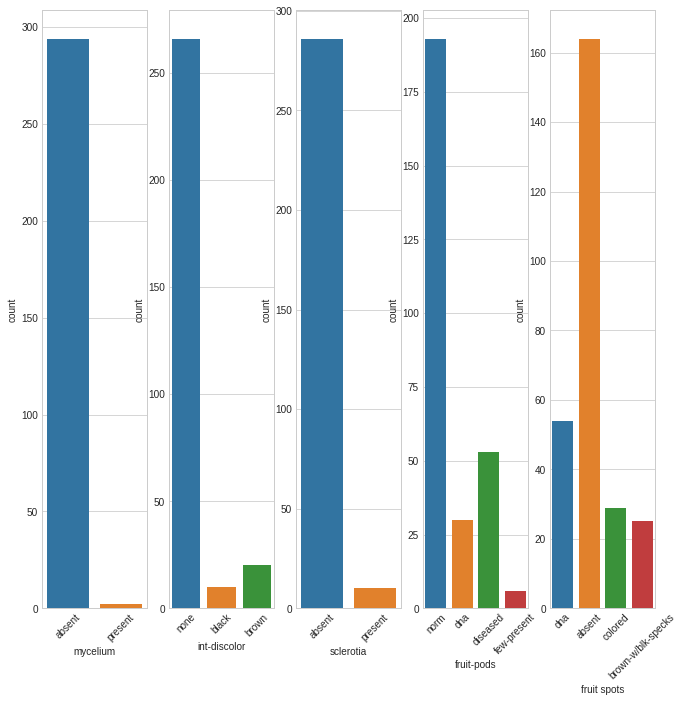

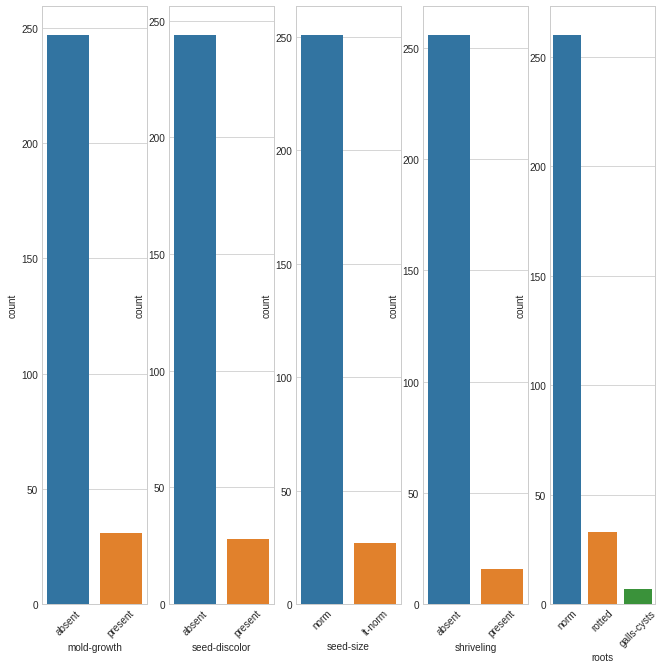

In [34]:
#target = soya_df['class']
#target

plt.figure(figsize = (11,11))
for i in range(1,6):
    plt.subplot(1,5, i)
    sns.countplot(columns[i],data = soya_df)
    plt.xticks(rotation=45)

plt.figure(figsize = (15,15))
for i in range(1,6):
    plt.subplot(1,5, i)
    sns.countplot(columns[i+6],data = soya_df)
    plt.xticks(rotation=45)

plt.figure(figsize = (11,11))
for i in range(1,6):
    plt.subplot(1,5, i)
    sns.countplot(columns[i+12],data = soya_df)
    plt.xticks(rotation=45)
    
plt.figure(figsize = (11,11))
for i in range(1,6):
    plt.subplot(1,5, i)
    sns.countplot(columns[i+18],data = soya_df)
    plt.xticks(rotation=45)

plt.figure(figsize = (11,11))
for i in range(1,6):
    plt.subplot(1,5, i)
    sns.countplot(columns[i+24],data = soya_df)
    plt.xticks(rotation=45)

plt.figure(figsize = (11,11))
for i in range(1,6):
    plt.subplot(1,5, i)
    sns.countplot(columns[i+30],data = soya_df)
    plt.xticks(rotation=45)


# plt.subplot(1,3, i-3)
# sns.countplot(columns[i],data = soya_df)
# plt.xticks(rotation=45)

### `Question`

- `Are any of the distributions redundant?`

 `ans`- Yes, some of the distributions are redundant.

In [35]:
soya_df.shape

(307, 36)

In [36]:
# pd.options.display.max_columns = 100
# pd.options.display.max_rows = 400

In [37]:
soya_df.head()

,class,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,...,int-discolor,sclerotia,fruit-pods,fruit spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots
0,diaporthe-stem-canker,october,normal,gt-norm,norm,yes,same-lst-yr,low-areas,pot-severe,none,...,none,absent,norm,dna,norm,absent,absent,norm,absent,norm
1,diaporthe-stem-canker,august,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,severe,fungicide,...,none,absent,norm,dna,norm,absent,absent,norm,absent,norm
2,diaporthe-stem-canker,july,normal,gt-norm,norm,yes,same-lst-yr,scattered,severe,fungicide,...,none,absent,norm,dna,norm,absent,absent,norm,absent,norm
3,diaporthe-stem-canker,july,normal,gt-norm,norm,yes,same-lst-yr,scattered,severe,none,...,none,absent,norm,dna,norm,absent,absent,norm,absent,norm
4,diaporthe-stem-canker,october,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,pot-severe,none,...,none,absent,norm,dna,norm,absent,absent,norm,absent,norm


In [38]:
soya_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   class            307 non-null    object
 1   date             306 non-null    object
 2   plant-stand      299 non-null    object
 3   precip           296 non-null    object
 4   temp             300 non-null    object
 5   hail             266 non-null    object
 6   crop-hist        306 non-null    object
 7   area-damaged     306 non-null    object
 8   severity         266 non-null    object
 9   seed-tmt         266 non-null    object
 10  germination      271 non-null    object
 11  plant-growth     306 non-null    object
 12  leaves           307 non-null    object
 13  leafspots-halo   282 non-null    object
 14  leafspots-marg   282 non-null    object
 15  leafspot-size    282 non-null    object
 16  leaf-shread      281 non-null    object
 17  leaf-malf        282 non-null    ob

In [39]:
soya_df_missing = soya_df.isna()
soya_df_missing.head()

,class,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,...,int-discolor,sclerotia,fruit-pods,fruit spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [40]:
soya_num_missing = soya_df_missing.sum()
soya_num_missing

class               0
date                1
plant-stand         8
precip             11
temp                7
hail               41
crop-hist           1
area-damaged        1
severity           41
seed-tmt           41
germination        36
plant-growth        1
leaves              0
leafspots-halo     25
leafspots-marg     25
leafspot-size      25
leaf-shread        26
leaf-malf          25
leaf-mild          30
stem                1
lodging            41
stem-cankers       11
canker-lesion      11
fruiting-bodies    35
external decay     11
mycelium           11
int-discolor       11
sclerotia          11
fruit-pods         25
fruit spots        35
seed               29
mold-growth        29
seed-discolor      35
seed-size          29
shriveling         35
roots               7
dtype: int64

In [41]:
sum(soya_num_missing) #/len(soya_df)

712

In [42]:
#soya_df.groupby(by=["class"], dropna=False).get_group('diaporthe-stem-canker')
soya_df.set_index('class', inplace=True)

<h1>1.1.4 Dimensionality reduction: PCA</h1>

<h3 style = 'color:tomato'>Question 1</h3>

### `With two components.`

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [44]:
penguins = pd.read_csv("penguins.csv")
penguins.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [45]:
penguins.keys()

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [46]:
feature = ['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g']
feature_target = ['species','sex']
penguins_important = penguins.loc[:,feature]
penguins_important = penguins_important.replace(np.nan, 0)

In [110]:
penguins_important

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,0.0,0.0,0.0,0.0
4,36.7,19.3,193.0,3450.0
...,...,...,...,...
339,0.0,0.0,0.0,0.0
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


In [48]:
pca2 = PCA(n_components=2)

In [49]:
pca2_data = pca2.fit_transform(penguins_important)

In [50]:
penguins_important.shape

(344, 4)

In [51]:
pca2_data.shape

(344, 2)

In [52]:
names = ['pca component1', 'pca component2']

In [53]:
pca2_penguins_df = pd.DataFrame(data = pca2_data , columns = names)
pca2_penguins_df

,pca component1,pca component2
0,427.630661,10.445300
1,377.539671,6.611544
2,927.243893,-13.507333
3,4180.614389,120.398013
4,727.343286,-6.795548
...,...,...
339,4180.614389,120.398013
340,-672.852901,-1.670354
341,-1572.821540,8.865294
342,-1022.712816,8.663628


In [54]:
pca2_penguins_df_final =  pd.concat([pca2_penguins_df, penguins[['sex','species']]], axis = 1)
pca2_penguins_df_final

,pca component1,pca component2,sex,species
0,427.630661,10.445300,MALE,Adelie
1,377.539671,6.611544,FEMALE,Adelie
2,927.243893,-13.507333,FEMALE,Adelie
3,4180.614389,120.398013,NaN,Adelie
4,727.343286,-6.795548,FEMALE,Adelie
...,...,...,...,...
339,4180.614389,120.398013,NaN,Gentoo
340,-672.852901,-1.670354,FEMALE,Gentoo
341,-1572.821540,8.865294,MALE,Gentoo
342,-1022.712816,8.663628,FEMALE,Gentoo


#### `Explained Ratio of two componets.`

In [55]:
pca2.explained_variance_ratio_

array([9.99772392e-01, 1.99736377e-04])

### `PCA of four components - raw data`

In [56]:
pca4 = PCA(n_components=4)
pca4_data= pca4.fit_transform(penguins_important)
pca4_data

array([[ 4.27630661e+02,  1.04452998e+01,  1.38681328e-01,
        -2.25195813e+00],
       [ 3.77539671e+02,  6.61154448e+00, -7.57501595e-01,
        -7.54684362e-01],
       [ 9.27243893e+02, -1.35073334e+01, -1.92961032e+00,
         3.05783943e-01],
       ...,
       [-1.57282154e+03,  8.86529416e+00,  9.93919749e-01,
         8.33089877e-02],
       [-1.02271282e+03,  8.66362753e+00, -1.71809781e+00,
         1.00321808e+00],
       [-1.22271368e+03,  1.05902784e+01,  2.68741051e+00,
        -1.43434537e-01]])

In [57]:
names2 = ['pca component1','pca component2','pca component3','pca component4']
pca4_penguins_df = pd.DataFrame(data = pca4_data , columns = names2)
pca4_penguins_df

,pca component1,pca component2,pca component3,pca component4
0,427.630661,10.445300,0.138681,-2.251958
1,377.539671,6.611544,-0.757502,-0.754684
2,927.243893,-13.507333,-1.929610,0.305784
3,4180.614389,120.398013,3.154513,10.155565
4,727.343286,-6.795548,-4.867947,-1.865745
...,...,...,...,...
339,4180.614389,120.398013,3.154513,10.155565
340,-672.852901,-1.670354,-0.853764,2.523580
341,-1572.821540,8.865294,0.993920,0.083309
342,-1022.712816,8.663628,-1.718098,1.003218


In [58]:
pca4_penguins_df_final =  pd.concat([pca4_penguins_df, penguins[['sex','species']]], axis = 1)
pca4_penguins_df_final

,pca component1,pca component2,pca component3,pca component4,sex,species
0,427.630661,10.445300,0.138681,-2.251958,MALE,Adelie
1,377.539671,6.611544,-0.757502,-0.754684,FEMALE,Adelie
2,927.243893,-13.507333,-1.929610,0.305784,FEMALE,Adelie
3,4180.614389,120.398013,3.154513,10.155565,NaN,Adelie
4,727.343286,-6.795548,-4.867947,-1.865745,FEMALE,Adelie
...,...,...,...,...,...,...
339,4180.614389,120.398013,3.154513,10.155565,NaN,Gentoo
340,-672.852901,-1.670354,-0.853764,2.523580,FEMALE,Gentoo
341,-1572.821540,8.865294,0.993920,0.083309,MALE,Gentoo
342,-1022.712816,8.663628,-1.718098,1.003218,FEMALE,Gentoo


`Explained variance of 4 components`

In [59]:
pca4.explained_variance_ratio_

array([9.99772392e-01, 1.99736377e-04, 2.17683150e-05, 6.10281279e-06])

<h3 style='color:tomato'>Question 2</h3>

In [60]:
from sklearn.preprocessing import MinMaxScaler

In [61]:
from sklearn.preprocessing import StandardScaler

<h3 style='color:green'>SCATTERPLOT FOR THE FIRST TWO PRINCIPLES COMPONENTS FOR RAW DATA.</h3>

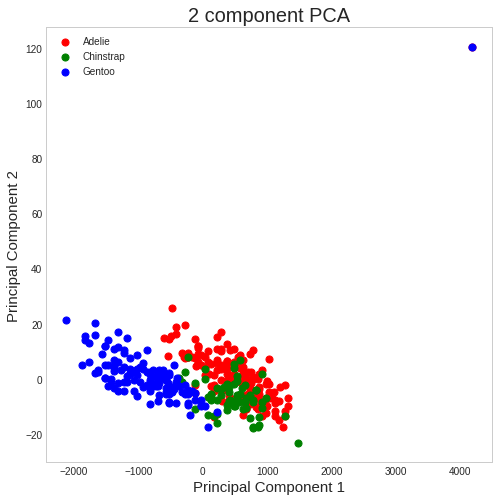

In [109]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Adelie','Chinstrap','Gentoo']
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = pca4_penguins_df_final['species'] == target
    ax.scatter(pca4_penguins_df_final.loc[indicesToKeep, 'pca component1']
               , pca4_penguins_df_final.loc[indicesToKeep, 'pca component2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

<AxesSubplot:xlabel='pca component1', ylabel='pca component2'>

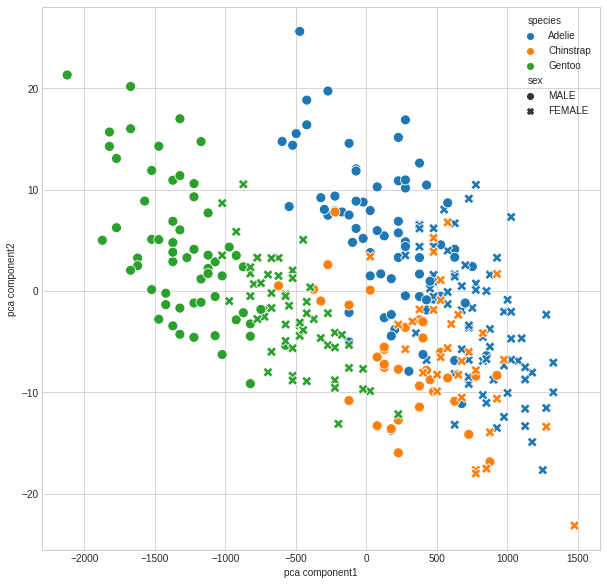

In [74]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="pca component1", y="pca component2",
    data=pca4_penguins_df_final,hue="species",style="sex",s=100)

In [99]:
scaler= make_pipeline(StandardScaler(), PCA(n_components=4, random_state=0))
pca4_penguins_scaled = scaler.fit_transform(penguins_important)

In [100]:
pca4_penguins_scaled_df = pd.DataFrame(data = pca4_penguins_scaled , columns = ['pca component1','pca component2','pca component3','pca component4'])
pca4_penguins_scaled_df

,pca component1,pca component2,pca component3,pca component4
0,1.215656,-0.631588,-0.236667,0.365293
1,1.011624,-0.110275,-0.159047,0.142259
2,1.043986,-0.539565,0.080604,-0.517528
3,12.498727,7.370790,1.124439,1.950357
4,1.275425,-0.930095,-0.579292,-0.307933
...,...,...,...,...
339,12.498727,7.370790,1.124439,1.950357
340,-1.145080,1.187002,0.066310,-0.174639
341,-2.272288,0.750649,-0.218530,0.406568
342,-1.154730,1.118612,-0.340873,0.177283


In [102]:
pca4_penguins_scaled_final =  pd.concat([pca4_penguins_scaled_df, penguins[['sex','species']]], axis = 1)
pca4_penguins_scaled_final

,pca component1,pca component2,pca component3,pca component4,sex,species
0,1.215656,-0.631588,-0.236667,0.365293,MALE,Adelie
1,1.011624,-0.110275,-0.159047,0.142259,FEMALE,Adelie
2,1.043986,-0.539565,0.080604,-0.517528,FEMALE,Adelie
3,12.498727,7.370790,1.124439,1.950357,NaN,Adelie
4,1.275425,-0.930095,-0.579292,-0.307933,FEMALE,Adelie
...,...,...,...,...,...,...
339,12.498727,7.370790,1.124439,1.950357,NaN,Gentoo
340,-1.145080,1.187002,0.066310,-0.174639,FEMALE,Gentoo
341,-2.272288,0.750649,-0.218530,0.406568,MALE,Gentoo
342,-1.154730,1.118612,-0.340873,0.177283,FEMALE,Gentoo


<h3 style='color:green'>SCATTERPLOT FOR THE FIRST TWO PRINCIPLES COMPONENTS FOR STANDARDIZED DATA.</h3>

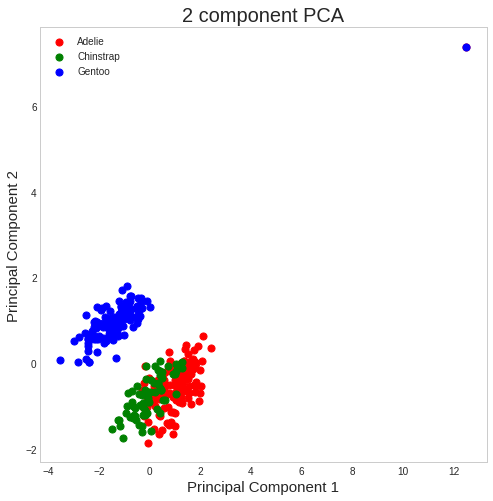

In [103]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Adelie','Chinstrap','Gentoo']
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = pca4_penguins_scaled_final['species'] == target
    ax.scatter(pca4_penguins_scaled_final.loc[indicesToKeep, 'pca component1']
               , pca4_penguins_scaled_final.loc[indicesToKeep, 'pca component2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

<AxesSubplot:xlabel='pca component1', ylabel='pca component2'>

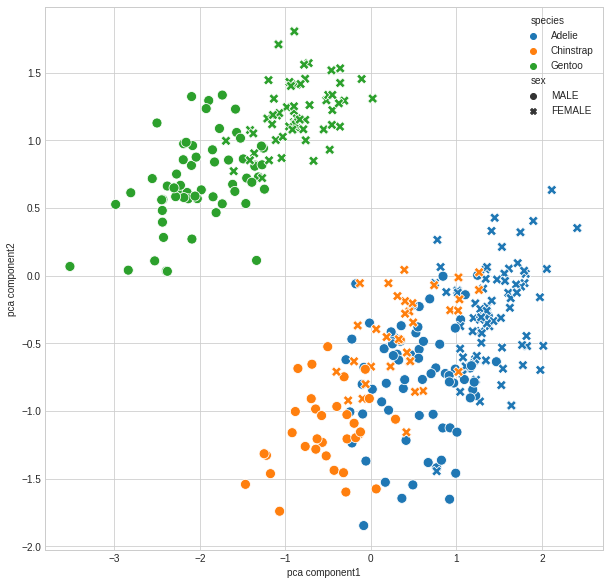

In [104]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="pca component1", y="pca component2",
    data=pca4_penguins_scaled_final,hue="species",style="sex",s=100)

### With the standardized data, we notice that the data is seperated and easily comparable. This makes it easier to interpret and analyze our data.